![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Problem Statement :
*In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.*
#### Data Description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

*File name: medical_examination.csv*



|Feature	|Variable Type	|Variable	|Value Type|
|:-----------|:---------------|-----------|:----------|
|Age	|Objective Feature	|age	|int (days)|
|Height	|Objective Feature	|height	|int (cm)|
|Weight	|Objective Feature	|weight	|float (kg)|
|Gender	|Objective Feature	|gender	|categorical code|
|Systolic blood pressure	|Examination Feature	|ap_hi	|int|
|Diastolic blood pressure	|Examination Feature	|ap_lo	|int|
|Cholesterol	|Examination Feature	|cholesterol	|1: normal, 2: above normal, 3: well above normal|
|Glucose	|Examination Feature	|gluc	|1: normal, 2: above normal, 3: well above normal|
|Smoking	|Subjective Feature	|smoke	binary|
|Alcohol intake	|Subjective Feature	|alco	|binary|
|Physical activity	|Subjective Feature	|active	|binary|
|Presence or absence of cardiovascular disease	|Target Variable	|cardio	|binary|

### Tasks
Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

<img src="https://imgur.com/QENzd9S.png" width="540">

Use the data to complete the following tasks in medical_data_visualizer.py

1. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

2. Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

4. Clean the data. Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile
5. Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

<img src="https://imgur.com/I9uHQ7N.png" width="640">

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Solution:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/medical_examination.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


We can see that, our data does not contains any missing or null values. Therefore, our data is already clean and ready for further processing.

### 1. Adding `overweight` Column

In [4]:
bmi = df['weight']/(df['height']/100)**2
bmi

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

```Python
#first principles level code
overwt = []
not_overwt = []

for val in bmi:
    if val > 25:
        overwt.append(val)
    else:
        not_overwt.append(val)

print(len(overwt))
print(len(not_overwt))
```

In [5]:
#add over weight column
df['overweight'] = [1 if val > 25 else 0 for val in bmi]

In [6]:
df.tail()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,0


### 2. Normalizing the data.
Normalize the data by making 0 always good and 1 always bad. 
* If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [7]:
df['cholesterol'].value_counts(),df['gluc'].value_counts()

(1    52385
 2     9549
 3     8066
 Name: cholesterol, dtype: int64,
 1    59479
 3     5331
 2     5190
 Name: gluc, dtype: int64)

```python
#first principle level code
guc_good = []
guc_bad = []

for val in df['gluc']:
    if val == 1:
        guc_good.append(val)
    else:
        guc_bad.append(val)
        
print(len(guc_good))
print(len(guc_bad))
```

In [8]:
df['cholesterol'] = [0 if val == 1 else 1 for val in df['cholesterol']]
df['gluc'] = [0 if val == 1 else 1 for val in df['gluc']]

In [9]:
df['cholesterol'].value_counts(),df['gluc'].value_counts()

(0    52385
 1    17615
 Name: cholesterol, dtype: int64,
 0    59479
 1    10521
 Name: gluc, dtype: int64)

In [10]:
columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight']

df_cat = pd.melt(df,id_vars=['cardio'],value_vars = columns)
df_cat[df_cat['variable']=='overweight']

,cardio,variable,value
350000,0,overweight,0
350001,1,overweight,1
350002,1,overweight,0
350003,1,overweight,1
350004,0,overweight,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [11]:
df_cat.loc[3347:3356,['variable','value']]

,variable,value
3347,cholesterol,0
3348,cholesterol,1
3349,cholesterol,0
3350,cholesterol,0
3351,cholesterol,0
3352,cholesterol,0
3353,cholesterol,0
3354,cholesterol,0
3355,cholesterol,1
3356,cholesterol,1


In [12]:
df_cat.reset_index(inplace = True)

In [13]:
var_group = df_cat.groupby(['variable','cardio','value'])

In [14]:
plot_v = var_group.agg('count')
plot_v

index
variable    cardio value       
active      0      0       6378
                   1      28643
            1      0       7361
                   1      27618
alco        0      0      33080
                   1       1941
            1      0      33156
                   1       1823
cholesterol 0      0      29330
                   1       5691
            1      0      23055
                   1      11924
gluc        0      0      30894
                   1       4127
            1      0      28585
                   1       6394
overweight  0      0      15915
                   1      19106
            1      0      10539
                   1      24440
smoke       0      0      31781
                   1       3240
            1      0      32050
                   1       2929

In [15]:
plot_v = plot_v.rename(columns ={'index':'total'})

In [16]:
plot_v.reset_index(inplace = True)

In [17]:
plot_v

,variable,cardio,value,total
0,active,0,0,6378
1,active,0,1,28643
2,active,1,0,7361
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,1941
6,alco,1,0,33156
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,5691


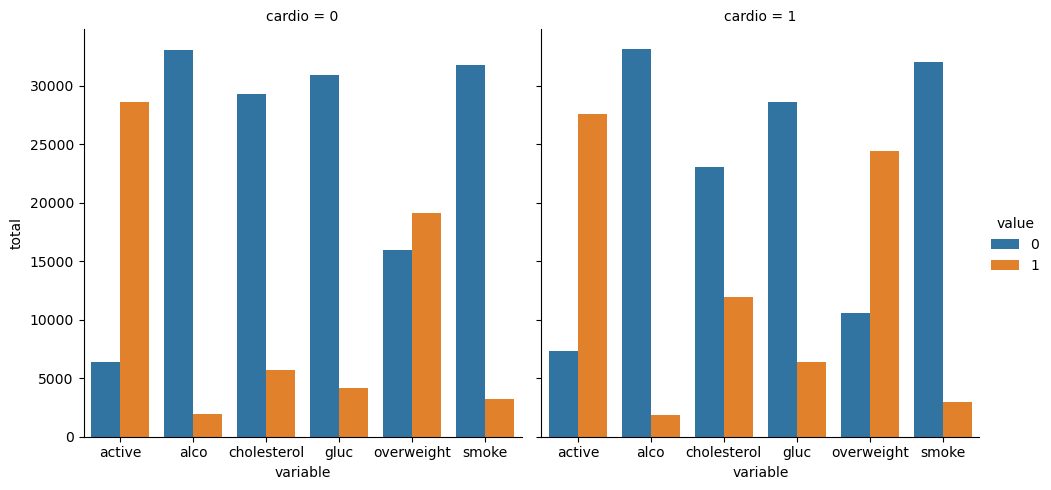

In [18]:
fig = sns.catplot(x='variable',y='total',col='cardio',hue='value',kind='bar',data=plot_v)
#plt.savefig('catplot_output1.png')

4. Clean the data. Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile
5. Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [19]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [20]:
df_hmap = df[(df['ap_lo'] <= df['ap_hi'])
            & (df['height'] >= df['height'].quantile(0.025))
            & (df['height'] <= df['height'].quantile(0.975))
            & (df['weight'] >= df['weight'].quantile(0.025))
            & (df['weight'] <= df['weight'].quantile(0.975))]

In [21]:
hmap_corr = df_hmap.corr()

In [22]:
mask = np.zeros_like(hmap_corr)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot: >

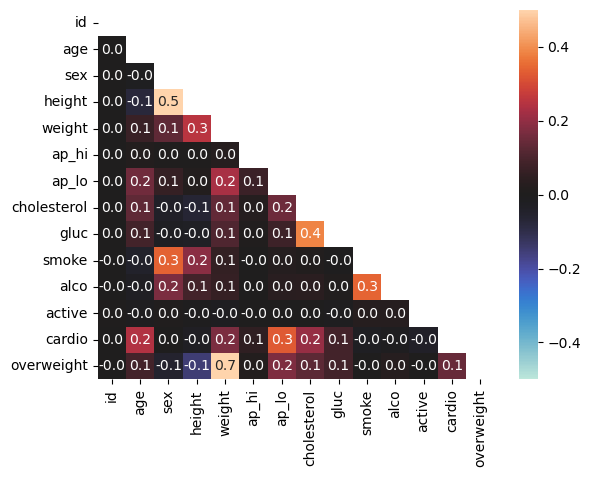

In [23]:
sns.heatmap(hmap_corr, mask=mask,annot=True, fmt='.1f',center=0, vmin=-0.5, vmax=0.5)
#plt.savefig('heatmap_output2.png')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<img src="https://imgur.com/3g7LyTV.png" align = 'right' width="240">

$End$ $of$ $the$ $notebook...$